### Loading the data 
The following example uses MNIST dataset: MNIST database http://yann.lecun.com/exdb/mnist/. We use a $28 \times 28$ image size. We can look to scale the test data to $56 \times56$ or even increase the dimensions to $28 \times 28 \times 28$ to observe empirical and predict theoretical complexity. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import struct
from sklearn.model_selection import train_test_split
from IPython.display import Image

# from google.colab import drive
# drive.mount('/content/drive')

# Load mnist data
def load_mnist(path, kind='train'):
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte' % kind)
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II', lbpath.read(8))
        labels = np.fromfile(lbpath, dtype=np.uint8)
        with open(images_path, 'rb') as imgpath:
            magic, num, rows, cols = struct.unpack(">IIII",imgpath.read(16))
            images = np.fromfile(imgpath, dtype=np.uint8).reshape(len(labels), 784)
            images = ((images / 255.) - .5) * 2
    return images, labels

# Simulate n-dimiensional data using 2d MNIST data
def generate_n_dim_data(curr_dim, n, data):
    return np.resize(data, [data.shape[0], int(data.shape[1]**(n/ curr_dim))])

full_path = os.getcwd()

# Diagnostic load and prints
X_train, y_train = load_mnist(full_path, kind='train')

# X_train, X_excess, y_train, y_excess = train_test_split(X_train, y_train, test_size = 0.999)

print('MNISIT TRAIN: Rows: %d, columns: %d' % (X_train.shape[0], X_train.shape[1]))

X_test, y_test = load_mnist(full_path, kind='t10k')
# X_test, X_excess, y_test, y_excess = train_test_split(X_test, y_test, test_size = 0.999)
print('MNISIT TEST: Rows: %d, columns: %d' % (X_test.shape[0], X_test.shape[1]))

#X_train_nd = generate_n_dim_data(2, 3, X_train)
#print('MNIST ND train: Rows: %d, columns: %d' % (X_train_nd.shape[0], X_train_nd.shape[1]))

#X_test_nd = generate_n_dim_data(2, 3, X_test)
#print('MNIST ND train: Rows: %d, columns: %d' % (X_test_nd.shape[0], X_test_nd.shape[1]))

MNISIT TRAIN: Rows: 60000, columns: 784
MNISIT TEST: Rows: 10000, columns: 784


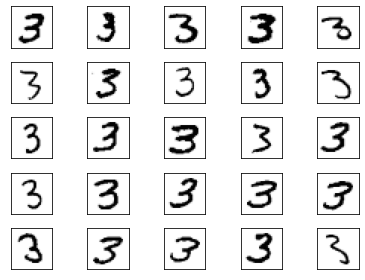

In [2]:
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(25):
    img = X_train[y_train == 3][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    plt.tight_layout()
plt.show()

2/2 | Cost: 381230.95 | Train/Valid Acc.: 9.88%/9.78% 


Accuracy= 9.80%  iteration  0


2/2 | Cost: 178713.08 | Train/Valid Acc.: 11.29%/10.60% 

Accuracy= 11.35%  iteration  1


2/2 | Cost: 178725.95 | Train/Valid Acc.: 11.29%/10.60% 

Accuracy= 11.35%  iteration  2


2/2 | Cost: 166227.37 | Train/Valid Acc.: 21.63%/20.88% 

Accuracy= 21.61%  iteration  3


2/2 | Cost: 155487.94 | Train/Valid Acc.: 21.41%/20.88% 

Accuracy= 21.62%  iteration  4


2/2 | Cost: 155185.42 | Train/Valid Acc.: 32.12%/31.88% 

Accuracy= 33.00%  iteration  5


2/2 | Cost: 124667.29 | Train/Valid Acc.: 48.73%/50.40% 

Accuracy= 49.10%  iteration  6


2/2 | Cost: 117079.74 | Train/Valid Acc.: 62.48%/65.22% 

Accuracy= 63.22%  iteration  7


2/2 | Cost: 99767.42 | Train/Valid Acc.: 69.01%/72.56%  

Accuracy= 69.62%  iteration  8


2/2 | Cost: 90231.46 | Train/Valid Acc.: 71.33%/73.88%  

Accuracy= 71.61%  iteration  9


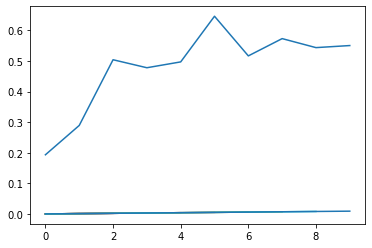

In [5]:
import time

print()

nn_holder = []
y_pred_holder = []
time_holder = []

iter = 10
for i in range(iter):
    
    start = time.time()
    nn = NeuralNetMLP(n_hidden=i, epochs=2, eta=0.001, minibatch_size=100, seed=1)
    nn.fit(X_train=X_train[:55000], y_train=y_train[:55000], X_valid=X_train[55000:], y_valid=y_train[55000:])
    y_pred = nn.predict(X_test)
    test_acc = ((np.sum(y_test == y_pred)).astype(np.float) / y_test.shape[0])
    print('Accuracy= %.2f%% ' % (test_acc*100), "iteration ", i)
    
    end = time.time()
    
    nn_holder.append(nn)
    y_pred_holder.append(y_pred)
    time_holder.append(end - start)
    
plt.plot(range(iter), time_holder)

x_linspace = np.linspace(0, range(iter))
y_linspace = x_linspace/1000

plt.plot(x_linspace, y_linspace)

plt.show()

### Deep Neural Network Code from scratch with Numpy
Here's the code I wrote to generalize the 2 layer MLP to a $n$ node \times $m$ layer Neural Network with backpropogation. 

The code does not learn correctly however does the correct number of computations. The code learns correctly when 1 hidden layer is defined, but suffers from what appears to be the vanishing gradient problem. Switching from a sigmoid to a ReLU activation function yielded no improvement. The implemented backpropagation formulas were verified against multiple online sources to be correct. 

1. http://neuralnetworksanddeeplearning.com/chap2.html
2. https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/
3. https://medium.com/@14prakash/back-propagation-is-very-simple-who-made-it-complicated-97b794c97e5c
4. https://www.youtube.com/watch?v=tIeHLnjs5U8
5. https://www.youtube.com/watch?v=8d6jf7s6_Qs

Loss function, optimizer, and data sparsity are a factor in proper learning and may be explored in the future.

In [47]:
class NN(object):
    def __init__(self, layers=[30, 30], epochs=100,
                 eta=0.1, minibatch_size=1, seed=None):
        self.random = np.random.RandomState(seed)  # used to randomize weights
        self.layers = layers  # list of layers
        self.epochs = epochs  # number of iterations
        self.eta = eta  # learning rate
        # size of training batch - 1 would not work
        self.minibatch_size = minibatch_size

    def _onehot(self, y, n_classes):
        onehot = np.zeros((n_classes, y.shape[0]))
        for idx, val in enumerate(y.astype(int)):
            onehot[val, idx] = 1.
        return onehot.T

    def _sigmoid(self, z):
        return 1. / (1. + np.exp(-np.clip(z, -10, 10)))

    def _sigmoid_derivative(self, a, index):
        return a[index] * (1. - a[index])
    
    def _relu(self, z):
        return np.maximum(z, 0)
        
    def _relu_derivative(self, a, index):
        return np.where(a[index] <= 0, 0, 1)

    def _compute_cost(self, y_enc, output, epsilon=1e-8):
        clipped_output=np.clip(output, 0.001,0.999)
        term1 = -y_enc * (np.log(clipped_output))
        term2 = (1. - y_enc) * np.log(1. - clipped_output)
        cost = np.sum(term1 - term2)
        
        return cost

    def predict(self, X_train):
        z, a = self._forward(X_train, np.arange(np.shape(X_train)[0]), self._relu)
        #print(z[-1])
        y_pred = np.argmax(z[-1], axis=1)
        return y_pred

    def _forward_calc_layer(self, X_train, layer_index, activation_function):
        z_h = np.dot(X_train, self.w[layer_index])
        a_h = activation_function(z_h)
        return z_h, a_h

    def _forward(self, X_train, batch_idx, activation_function):

        z = []
        a = []
        for index, layer_weights in enumerate(self.w):
            if index == 0:
                z_h, a_h = self._forward_calc_layer(X_train[batch_idx], index, activation_function)
            else:
                z_h, a_h = self._forward_calc_layer(a[-1], index, activation_function)

            z.append(z_h)
            a.append(a_h)
            
        return z, a

    def _backward(self, X_train, y_train_enc, batch_idx, a):
        deltas = []
        grads = []
        # print(self.w)
        for index in range(len(self.w) - 1, -1, -1):
            derivative_h = self._relu_derivative(a, index)
            if index == len(self.w) - 1:
                delta = np.multiply(a[-1] - y_train_enc[batch_idx], derivative_h)
                grad = np.dot(a[index-1].T, delta)
                
            elif index == 0:
                delta = np.multiply(np.dot(delta, self.w[index + 1].T), derivative_h)
                grad = np.dot(X_train[batch_idx].T, delta)
                
            else:
                delta = np.multiply(np.dot(delta, self.w[index + 1].T), derivative_h)
                grad = np.dot(a[index-1].T, delta)

            deltas.insert(0, delta)
            grads.insert(0, grad)

        for index, grad in enumerate(grads):
            self.w[index] -= grad*self.eta
        return list(deltas), list(grads)

    def fit(self, X_train, y_train, X_valid, y_valid):
        import sys
        n_output = np.unique(y_train).shape[0]  # number of class labels
        n_features = X_train.shape[1]  # number of features

        self.w = []
        self.w.append(np.array(self.random.normal(loc=0.0, scale=0.1, size=(n_features,self.layers[0]))))
        prev_layer = self.layers[0]

        for index, layer in enumerate(self.layers[1:]):  # skip first and last layer because we need to hard code
            self.w.append(self.random.normal(loc=0.0, scale=0.1, size=(prev_layer, layer)))
            prev_layer = layer

        self.w.append(self.random.normal(loc=0.0, scale=0.1, size=(
            self.layers[-1], n_output)))  # random normal dist matrix

        y_train_enc = self._onehot(y_train, n_output)  # one-hot encode original y

        for i in range(self.epochs):
            indices = np.arange(X_train.shape[0])  # n samples
            # index iterate over n samples with minibatch size steps
            for start_idx in range(0, indices.shape[0] - self.minibatch_size + 1, self.minibatch_size):
                batch_idx = indices[start_idx: (start_idx + self.minibatch_size)]
                # forward feed
                z, a = self._forward(X_train, batch_idx, self._relu)

                # back prop
                deltas, grads = self._backward(X_train,y_train_enc,batch_idx, a)

            z, a = self._forward(X_train, np.arange(X_train.shape[0]), self._relu)
        
            cost = self._compute_cost(y_enc=y_train_enc, output=a[-1])

            y_train_pred = self.predict(X_train)
            y_valid_pred = self.predict(X_valid)
            
            train_acc = (
                (np.sum(
                    y_train == y_train_pred)).astype(
                    np.float) /
                X_train.shape[0])
            valid_acc = (
                (np.sum(
                    y_valid == y_valid_pred)).astype(
                    np.float) /
                X_valid.shape[0])

            sys.stderr.write(
                '\r%d/%d | Cost: %.2f '
                '| Train/Valid Acc.: %.2f%%/%.2f%% ' %
                (i + 1, self.epochs, cost, train_acc * 100, valid_acc * 100))
            sys.stderr.flush()
        return self

### DNN Train example

In [51]:
import time

nn_holder = []
y_pred_holder = []
time_holder = []
iters = 2
epochs = 100

start = time.time()
nn = NN(layers=[32, 32, 32], epochs=epochs, eta=0.00005, minibatch_size=256, seed=1)

#for row in X_train[55000:]:
#    print(row)

nn.fit(X_train=X_train[:55000], y_train=y_train[:55000], X_valid=X_train[55000:], y_valid=y_train[55000:])
y_pred = nn.predict(X_test)
test_acc = ((np.sum(y_test == y_pred)).astype(np.float) / y_test.shape[0])
print('Final accuracy= %.2f%% ' % (test_acc*100))

end = time.time()

nn_holder.append(nn)
y_pred_holder.append(y_pred)
time_holder.append(end - start)


   

100/100 | Cost: 25940.96 | Train/Valid Acc.: 93.82%/95.06% 

Final accuracy= 93.57% 


### 3D noise plot example

[[3.57060981e-01 4.74268880e-01 2.53686978e-01 9.43377709e-01
  1.08977487e-01 5.08350605e-02 1.90189739e-01 9.57515778e-01
  4.00854785e-01 1.05956834e-01]
 [9.61140118e-02 5.94106586e-02 2.22434160e-01 8.44560819e-01
  1.63732730e-01 8.86815610e-02 3.24490630e-01 3.67558520e-01
  6.20033345e-01 6.08993295e-01]
 [4.91386244e-01 7.64400143e-01 5.86825016e-01 7.35072181e-02
  7.35220620e-01 4.69221981e-02 3.88497560e-01 5.21036359e-01
  3.69743064e-01 6.28757405e-01]
 [1.23004478e-01 1.76370501e-01 3.42477506e-02 4.87470602e-01
  2.88328726e-01 4.10701631e-01 6.52361058e-01 1.72177569e-01
  4.66930407e-01 5.21981670e-01]
 [6.55333290e-01 3.35443934e-01 6.55172078e-02 6.06772142e-02
  6.08718519e-02 2.68269981e-01 1.22147435e-01 4.41215783e-01
  2.75354755e-01 8.00941355e-01]
 [8.78736458e-01 7.54976984e-01 1.30836649e-01 2.27831921e-01
  8.41465429e-01 9.16195539e-01 5.32919348e-01 5.87199041e-01
  2.73058480e-01 4.13571243e-01]
 [4.83015917e-01 7.27622868e-01 7.30314510e-01 8.31976000e

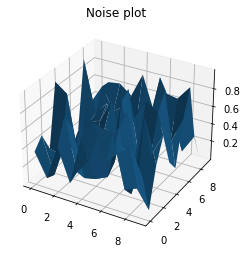

In [52]:
import numpy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Set up grid and test data
nx, ny = 10, 10
x = range(nx)
y = range(ny)

data = numpy.random.random((nx, ny))

print(data)

hf = plt.figure()
ha = hf.add_subplot(111, projection='3d')

X, Y = numpy.meshgrid(x, y)  # `plot_surface` expects `x` and `y` data to be 2D
ha.plot_surface(X.T, Y.T, data)

plt.title('Noise plot')

plt.show()


### Nodes and Layers vs Execution Time

10/10 | Cost: 380421.79 | Train/Valid Acc.: 9.88%/9.78%   /tmp/ipykernel_14775/4009780871.py:27: RuntimeWarning: invalid value encountered in less_equal
  return np.where(a[index] <= 0, 0, 1)
10/10 | Cost: 380421.79 | Train/Valid Acc.: 9.88%/9.78%   /tmp/ipykernel_14775/4009780871.py:78: RuntimeWarning: invalid value encountered in multiply
  delta = np.multiply(np.dot(delta, self.w[index + 1].T), derivative_h)
10/10 | Cost: 380421.79 | Train/Valid Acc.: 9.88%/9.78%   

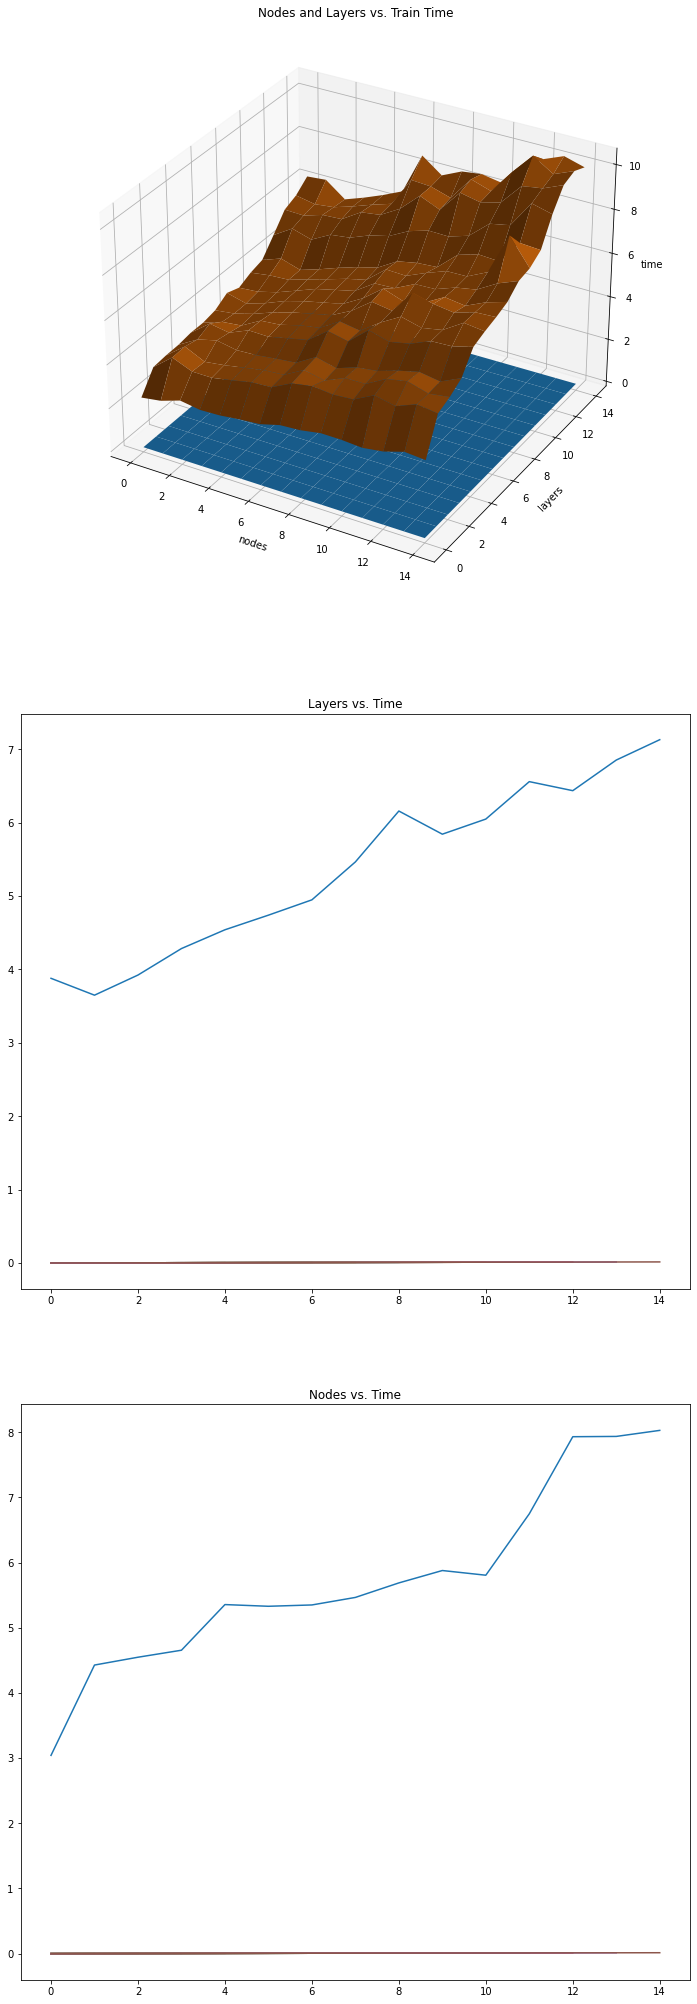

In [53]:
import time
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


time_holder = []
time_holder_inner = []
layers = 15
nodes = 15
epochs = 10

# Plot time vs neural network hidden layers and nodes

for i in range(1, 1+ layers):
    for j in range(1,1+nodes):
        start = time.time()
        nn = NN(layers=np.repeat(j, i), epochs=epochs, eta=1, minibatch_size=100, seed=1)
        nn.fit(X_train=X_train[:55000], y_train=y_train[:55000], X_valid=X_train[55000:], y_valid=y_train[55000:])
        y_pred = nn.predict(X_test)
        test_acc = ((np.sum(y_test == y_pred)).astype(np.float) / y_test.shape[0])
        #print('Accuracy= %.2f%% ' % (test_acc*100), "iteration ", i)

        end = time.time()

        time_holder_inner.append(end - start)
    time_holder.append(time_holder_inner)
    time_holder_inner = []

x = range(nodes)
y = range(layers)

X, Y = np.meshgrid(x, y)

hf = plt.figure(figsize=(12,36))

hf.subplots_adjust(hspace=0.2)

x_linspace = np.linspace(0, x)
y_linspace = x_linspace/1000
ysq_linspace = x_linspace**2

def xy(x, y, c):
    return x*y/c

Z = xy(X, Y, layers*nodes*10)

ha = hf.add_subplot(311, projection='3d')
ha.plot_surface(X, Y, Z)
ha.plot_surface(X.T, Y.T, np.array(time_holder))
ha.set_xlabel('nodes')
ha.set_ylabel('layers')
ha.set_zlabel('time')

plt.title('Nodes and Layers vs. Train Time')

hf.add_subplot(312)
plt.title('Layers vs. Time')
plt.plot(x, np.array(time_holder)[:,nodes//2])
plt.plot(x_linspace, y_linspace)

hf.add_subplot(313)
plt.title('Nodes vs. Time')
plt.plot(y, np.array(time_holder)[layers//2,:])
plt.plot(x_linspace, y_linspace)


#### Results from 6-core i7 Processor

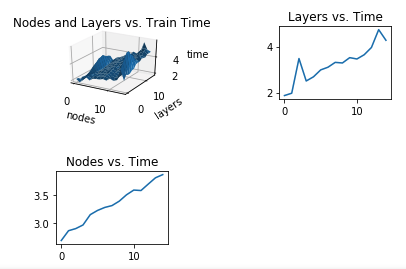

In [54]:
Image(filename='Nodes-Layers-Time.png')

### Dimensions and Layers vs Execution Time

2/2 | Cost: 136647.51 | Train/Valid Acc.: 9.65%/9.79%  

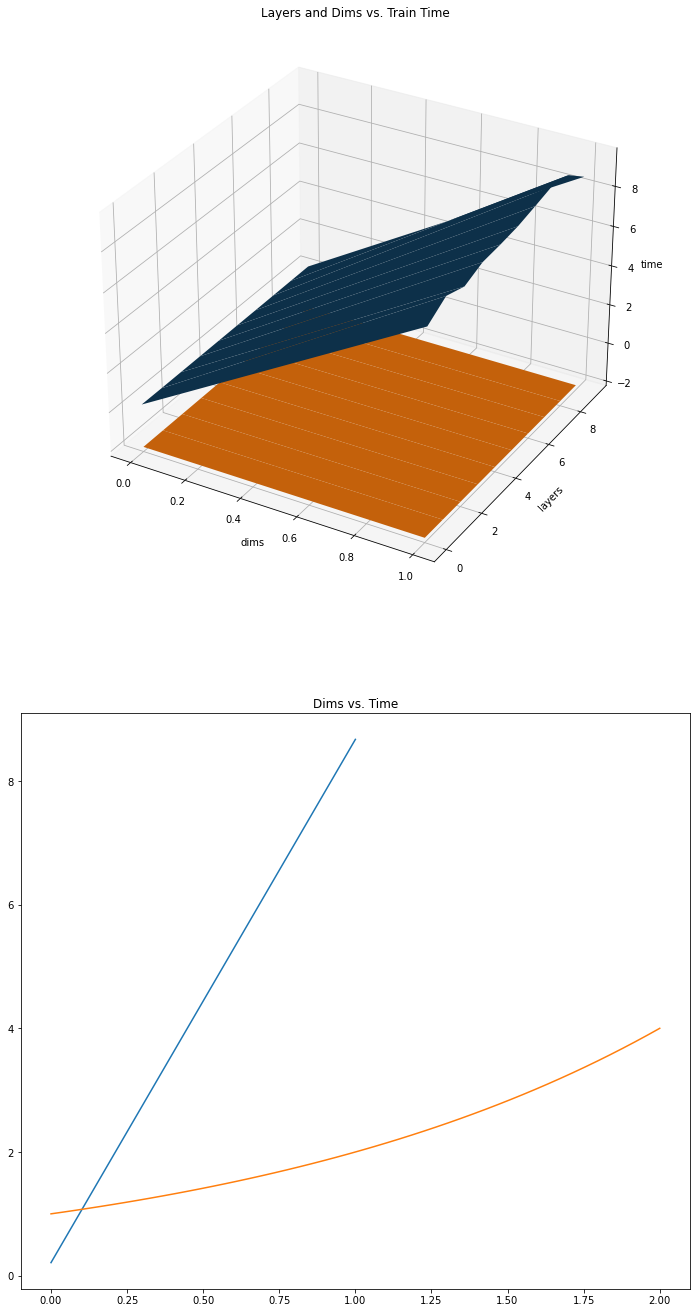

In [55]:
import time
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


time_holder = []
time_holder_inner = []
dims = 2
layers = 10
epochs = 2

# Plot time vs neural network hidden layers and nodes

for i in range(2,2+dims):
    X_train_nd = generate_n_dim_data(2, i, X_train)
    X_test_nd = generate_n_dim_data(2, i, X_test)
    for j in range(1, 1+ layers):
        

        samples = np.shape(X_train_nd)[1]
        sep = int(9*samples/10)
        
        start = time.time()
        nn = NN(layers=np.repeat(5, j), epochs=epochs, eta=1, minibatch_size=100, seed=1)
        #print(np.shape(X_train_nd))
        #print(np.shape(y_train))
        nn.fit(X_train=X_train_nd[:sep], y_train=y_train[:sep], X_valid=X_train_nd[sep:], y_valid=y_train[sep:])
        y_pred = nn.predict(X_test_nd)
        test_acc = ((np.sum(y_test == y_pred)).astype(np.float) / y_test.shape[0])
        #print('Accuracy= %.2f%% ' % (test_acc*100), "iteration ", j)

        end = time.time()

        time_holder_inner.append(end - start)
    time_holder.append(time_holder_inner)
    time_holder_inner = []

y = range(layers)
x = range(dims)

X, Y = np.meshgrid(x, y)

def xy(x, y, c):
    return np.power(50, x) * y / c - 5

Z = xy(X, Y, 100000)


hf = plt.figure(figsize=(12, 36))
hf.subplots_adjust(hspace=0.2)
ha = hf.add_subplot(311, projection='3d')


ha.plot_surface(X.T, Y.T, np.array(time_holder))
ha.plot_surface(X, Y, Z+3)

ha.set_xlabel('dims')
ha.set_ylabel('layers')
ha.set_zlabel('time')

plt.title('Layers and Dims vs. Train Time')

hf.add_subplot(312)

plt.title('Dims vs. Time')
plt.plot(x, np.array(time_holder)[:,layers-1])
plt.plot(np.linspace(0, dims), np.power(2,np.linspace(0, dims)))





#### Results from 6-core i7 Processor

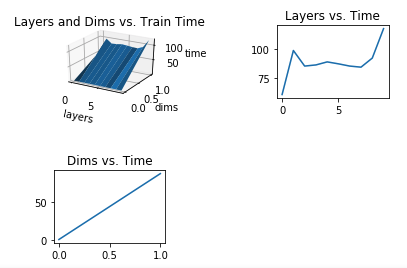

In [56]:
Image(filename='Dims-Layers-Time.png')

### Preface
I chose to study this algorithm because it's applicable to my future area of focus, Machine Learning. Coding from scratch will help me to gain better intuition into the technology. Since simple neural networks can build other types of deep learning models like GAN/LSTM, learning about the fundamentals will help me reason about more complex concepts better in the future. Neural networks are a great implementation of a greedy algorithm. It's regression on steroids, and it has data structures and optimization involved. There are a lot of hyperparameters to vary, which I'd like to analyze their effects on execution time and time complexity. It utilizes a large number of matrices (2d vectors or 2d arrays) which can be vector multiplied by the processing unit easily. Matrices represents weights and biases going to and from 'neurons'. It can use linked lists however, it is not optimal because they cannot be manipulated for vector multiplication easily. 

### Introduction

Neural networks have become computationally feasible with modern GPU and microprocessor advancements, making new tech capabilities like image recognition, realistic data generation, AI-like responses. These technologies enabled by neural networks and deep learning have changed our standard of living, but also created new problems for human society to address. 

Neural networks utilize multiple layers of nodes/neurons and edges/synapses that "learn" from data. Each node and preceeding adjacent weights can be thought of as a multivariate regression model. Neural networks leverage a huge quantity of these regression equations in tandem to learn underlying relationships a lot more quickly and in a more complex manner. Each multivariate regression model has the potential to represent a lot of interaction terms, if not all of the possible interaction terms given the featurers, in matrix form, so that it can be comprehensive and parralellizable. To iteratively optimize our entire neural network, we use gradient descent, which basically uses our cost function, derivatives/gradients of functions, and tons of chain rule. Gradient descent is a greedy algorithm. It is used because the function we are trying to optimize can be incomprehensibly complex to solve or may not have a solution. Gradient descent takes uses information obtained at the current iteration to go to the best estimated solution at the current moment. It never uses known patterns to take a worse estimated solution to achieve a greater net estimated solution in the future.

### Pseudocode

1. Initialize data structions (matrices, intermediate calculation lists, objects)
2. Initialize weights to random normal weights
3. Foe each data batch:
    1. For each layer:
        1. For each synapse/regression equation
            1. Sum the products of the previous activation functions results and current weights
            2. Apply activation function to current sum of products to utilize in next layer
    2. Calculate error
    3. For each layer:
        1. For each synapse/regression equation
            1. Calculate gradient and derivative with respect to weights
            2. Subtract derivitive with respect to weights times learning rate

### Evaluation

Let each datapoint be $ixi$ data points of batch size $b$ and let $j$ be the number of iterations on any batches. Let $n$ be the hidden layers. Let $m1, m2 ... m_n$ be the nodes in a layer. Let $k$ be the classes. We will use big $O$ notation because optimizations or advanced/naive implementations greatly varies the lower bound. 

### Forward feed

Matrix multiply of $a \times b$  and $b \times c$ size matrices $= O(a*b*c)$  
Loop unrolled and SIMD vector matrix multiply is $\Omega(a*c)$  
Source: https://stackoverflow.com/questions/10442365/why-is-matrix-multiplication-faster-with-numpy-than-with-ctypes-in-python



Each transition between layers can be represented by 2 dimensional matrix multiplication. 

Dimensions for the inputs are $ b \times i^2 $. Matrix dimensions for the input and first layer is $b * i^2 \times m_1$. The time complexity of the first matrix calculation is $O(b*i^2*m_1)$. 

The matrix dimensions from the first to second layers are  and $m_1 \times m_2$. Time complexity of the second calculation is $O(m_1*m_2)$. 

We will generalize the time complexity to $O(b \times i^2 \times m_{avg})$ or $O(m_{avg}^2)$. 

Parallelized matrix multiplication has time complexity  is $\Omega(m_{avg})$ because there are $m_{avg}$ vector multiplications, which are $\Omega(1)$.

An activation function is applied to the product between layers, which takes $O(m_{avg})$ and $\Omega(1)$ time.  

With $n$ layers, $j$ batch iterations, Forward feed takes $O(n*j*(m^2 + m))$ time, which is equivalent to $O(n*j*m^2)$ time. $\Omega(n*j*(m+1)) = \Omega(n*j*m)$ time.  

Space complexity is $\Theta(n*m^2+i^2*j)$. $n*m^2$ for the weights and biases and $i^2*j$ for the data set.

### Backpropogation
We implemented a steepest gradient descent algorithm based on the inputs, costs, and activation functions of our neural network.  
Assume we use the $SSE$ Cost function. The derivative is a vector subtraction, which is $O(max(j, m))$ and $\Omega(1)$ time.  

$\delta^{(out)}=a^{(out)}-y$ .......... $(5)$

$\delta^{(h)}=\delta^{(out)}\big( W^{(out)} \big)^{\top} \odot \big( a^{(h)} \odot \big(1-a^{(h)}\big)\big)$ .......... $(6)$

$\frac{\partial}{\partial w_{i,j}^{(out)}}J(W)=a_j^{(h)}\delta_i^{(out)}$ .......... $(7)$

$\frac{\partial}{\partial w_{i,j}^{(h)}}J(W)=a_j^{(in)}\delta_i^{(h)}$ .......... $(8)$

    for index in range(len(self.w) - 1, -1, -1):
        sigmoid_derivative_h = a[index] * (1. - a[index])  # Eq 3
        if index == len(self.w) - 1:
            delta = a[-1] - y_train_enc[batch_idx]  # Eq 5
            grad = np.dot(a[index - 1].T, delta)  # Eq 7
        elif index == 0:
            delta = (np.dot(deltas[-1], self.w[index + 1].T)
                     * sigmoid_derivative_h)  # Eq 6
            grad = np.dot(X_train[batch_idx].T, delta)  # Eq 8
        else:
            delta = (np.dot(deltas[-1], self.w[index + 1].T)
                     * sigmoid_derivative_h)  # Eq 6
            grad = np.dot(a[index - 1].T, delta)  # Eq 7

$\delta $ is the output error, shown in equation 5 and 6. The left hand operand is a matrix vector multiplication and the right hand operand is a vector vector multiplication that can vary based on the activation function. So we're looking to multiply a vector with a matrix with a product of two vectors. This can be done in $O(m_1*m_2+m_1+m_1)$ = $O(m_{avg}^2)$ and $\Omega(m_{avg})$ time.  
$\frac{\partial}{\partial w_{i,j}^{(h)}}J(W) $, the change in cost with respect to weights shown in equations 7 and 8 take $O(m_0*m_1)$ = $O(m_{avg}^2)$  and $\Omega(m)$ time.  

        for index, item in enumerate(grads):
            self.w[len(self.w) - index - 1] -= np.array(item) * self.eta  # Eq 9

Updating the weights takes $O(m_{avg})$ and $\Omega(1)$ for every layer - represented in equation 9.  

So one layer backprop takes $O(m_{avg}^2 + m_{avg}^2 + m_{avg})$ and $\Omega(m_{avg})$ for one data point. So for $n$ layers and $j$ iterations, it takes $O(j*n*m_{avg}^2)$ and $\Omega(j*n*m_{avg})$ time.  

So total time complexity for forward feed and backprop is $O(n*j*m^2 + n*j*m^2) = O(n*j*m^2)$ and $\Omega(n*j*m + n*j*m) = \Omega(n*j*m)$ time.

### Data set
I used the MNIST dataset as the canonical data set. MNIST data is a collection of handwritten numbers in image form. The image is represented as a series of 0s and 1s for each pixel of the image. We train on a one hot encoding of this data. We only use this data format because most data can be transformed into this data, including regular feature data, categorical one hot encoded data, and $>2$ dimensional data.

### Evaluation

#### Nodes and Layers vs Time
We plotted the nodes per layer vs time. When layers and iterations are constant, the theoretical complexity is $O(m^2)$ and $\Omega(m)$. The empirical data fits within these growth bounds and resembles the lower bound more.

We plotted the layers vs time. When nodes and iterations are constant, the theoretical complexity is $\Theta(n)$. The empirical data resembles the theoretical time complexity. 

The empirical surface plot with Layers and Nodes vs Time fits well within the big $O$ and $\Omega$ time complexity bounds and resembles the $\Omega$ time complexity more. 


#### Data Dimensions and Layers vs Time
We plotted the nodes per layer vs time. When layers and iterations are constant, the theoretical complexity is $O(m^2)$ and $\Omega(m)$. The empirical data fits within these growth bounds and resembles the lower bound more.

We plotted the dimensions vs time. When nodes, layers, and iterations are constant, the theoretical complexity is $\Theta(i^d)$. The empirical data resembles the theoretical time complexity. 

The number of dimensions of data aren't increased or decreased frequently but just for the sake of seeing it's effect (this may be a more common thing to do in the future as we measure data in higher dimensional spaces), we analyze it's theoretical time complexity:  $O(j*i^d*b*m_1 + n*j*m_{avg}^2)$ and $\Omega(j*i^d*b*m_1 + n*j*m_{avg})$. Here we see that the first layer calculation can easily dominate the rest of the operations carried out in the neural network. The empirical surface plot with Layers and Nodes vs Time fits well within the big $O$ and $\Omega$ time complexity bounds and resembles the $\Omega$ time complexity more. Note that the growth as layers increase is dwarfed by the increase caused by the number of dimensions. 

The plots were consistent with the theoretical time complexity of a neural network. The execution time gravitated more towards the big $\Omega$ time complexity because the algorithms were run using numpy matrices, which probably utilized SIMD parallelized matrix multiplication. This plot was run on Google Cloud Colab TPU, however plots run on personal non-gpu machines had similar growth rates for large dimension matrices. This is why I think numpy is doing most of the parralelizing causing the empirical time complexity to gracitate towards the theoretical lower bound.

We also plotted number of layers and dimensions of data vs time. The plot appears to be consistent with the theoretical time complexity of a neural network. 

### Conclusion
Neural networks using gradient descent find minima using a greedy approach. Successive layer weights utilize previous computations for layer weights, so the algorithm uses dynamic programming for a sub-problem of the solution (chain rule). The algorithm doesn't guarantee the exact solution, however it learns better than many algorithms these days because we can leverage today's much better computational services. We've shown that the algorithm runs in $O(j*i^d*b*m_1 + n*j*m_{avg}^2)$ and $\Omega(j*i^d*b*m_1 + n*j*m_{avg})$ time. Dimensions aren't frequently changed as a variable, but it may be something to take note of in certain mathematics/physics problems in the future dealing with infinite dimensional matrices. 